# 

# Graphing functions with Julia

Read about this here: [Graphing Functions with
Julia](http://mth229.github.io/graphing.html).

`Julia` has several packages that allow for graphical presentations, but
nothing “built-in.”

Several reasonable options exist, but these are the two most common
packages used:

-   `Plots` which offers a unified front end to several different
    plotting backends (`pyplot` or `matplotlib`; `GR`; `plotly`;
    `unicodeplots`; and others). Plots has a recipe system that makes it
    easier to add default plots to many object types. We will utilize
    the interface for functions. In the following we call `plotly()` to
    set the Plotly backend for web-based graphics. This sometimes fails
    due to JavaScript issues. The `gr()` backend produces static
    graphics and is available by default.

-   `Makie` which offers the most advanced graphics interface,
    especially for 3-d graphics. It will *likely* be the default choice
    for `Julia` users at some point.

We load both a plotting package, its backend, and the `MTH229` package
with this block of commands:

In [1]:
using MTH229
using Plots
plotly()

------------------------------------------------------------------------

The `Plots` package brings in a `plot` function that makes plotting
functions as easy as specifying a function object and the $x$ domain to
plot over:


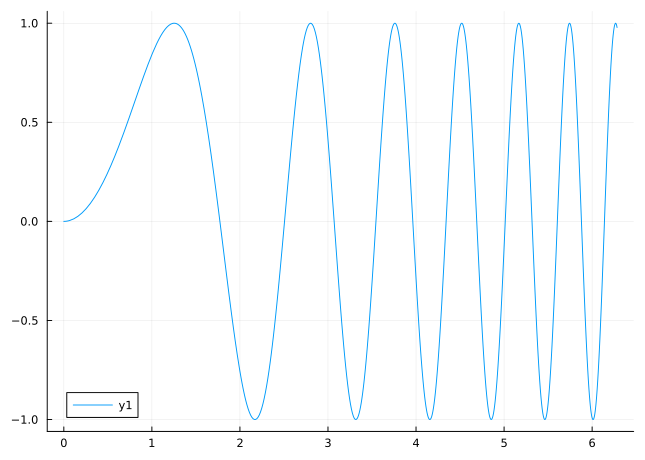

In [3]:
f(x) = sin(x^2)
plot(f, 0, 2pi)

Often most of the battle is *judiciously* choosing the range of values,
$[a,b]$, so that the graph highlights a feature of interest: for example
a relative maximum or minimum, a zero, a vertical asymptote, a
horizontal asymptote, a slant asymptote…

The use of a function as an argument is not something done with a
calculator, but is very useful when using `Julia` for calculus, as many
actions may be viewed as operating on the function $f$, not the values
of the function, $f(x)$.

### Backends

The `Plots` package has two backends installed with it, and others are
available. The `gr()` backend is loaded by default. To try an
*interactive* backend using web technologies, issue the command
`plotly()`.

------------------------------------------------------------------------

More than one function can be plotted on a graph. The `plot!` function
makes this easy: make the first plot with `plot` and any additional ones
with `plot!`. For example:


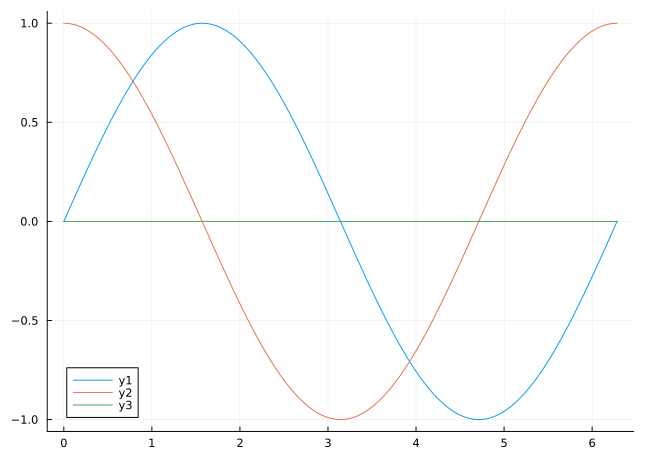

In [4]:
plot(sin, 0, 2pi)
plot!(cos)
plot!(zero)

The legend can be suppressed by specifying `legend=false` to the first
plot; e.g. `plot(sin,0, 2pi, legend=false)`. There is not need to add
limits to the `plot!` command if the existing viewing window, $[a,b]$,
is desired.

(A convention in `Julia` is to use a trailing `!` in a function name to
indicate that the function will modify an existing object. In this case
`plot!` modifies the existing plot, which is implicitly known to the
function.)

------------------------------------------------------------------------

A plot is nothing more than a connect-the-dot graph of paired $x$ and
$y$ values. It can be useful to know how to do the steps. The above
graph of `sin` could be done with:


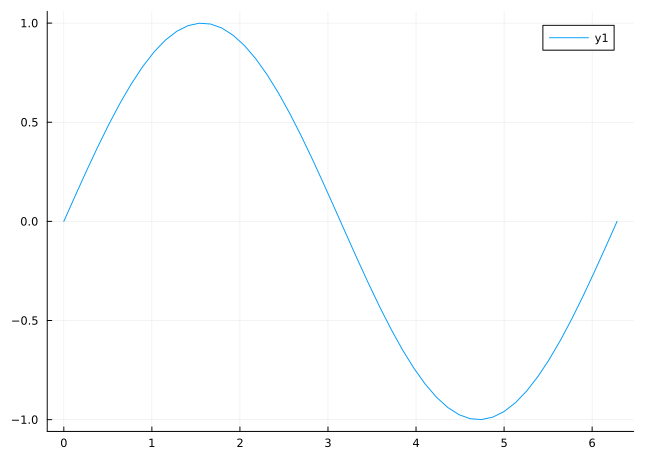

In [5]:
a, b = 0, 2pi
xs = range(a, b, length=50)         # 50 points between a and b
ys = sin.(xs)                       # or ys = [sin(x) for x in xs]
plot(xs, ys)

The `xs` and `ys` are written as though they are “plural” because these
variables contain 50 values each in a container. The function call
`sin.(xs)` adds a “dot” to the parentheses. This syntax instructs
`Julia` to “broadcast” `sin` to *each* value in the container `xs`.

The plot “recipe” for plotting functions provided by `Plots` does a bit
more than this, as it adaptively specifies the points to plot.

The `scatter!` function can be used to add points to a graph. These may
be specified as collections of `x` and `y` values, as above.

## NaN values.

The value `NaN` is a floating point value that arises during some
indeterminate operations, such as `0/0`. The `plot` function will stop
connecting the dots when it encounters an `NaN` value. This convention
can be gainfully employed to introduce breaks, or discontinuities, in a
graph.

## Mapping a function over a collection

In `Julia` a collection of values can be made by combining them with
square brackets, as in `[1,1,2,3,5]`. The square brackets use a vector
for the enclosing container. Parentheses also combine values using a
“tuple.”

For reqular patterns the colon operator can be used: `1:5` is
essentially `[1,2,3,4,5]`. If the gap between succesive numbers is not
`1`, but, say, `h`, it can be set with the syntax `a:h:b`.

The `range` function is also used to specify regular patterns, as in:
`range(a, b, n)`, which specified `n` evenly spaced points from `a` to
`b`. Using the colon syntax or the `range` function only creates a means
to generate values, rather than the values themselves.

Collections of values are useful for many reasons. We will see later how
they are used to store the zeros of a function.

`Julia` has a few different ways of applying a function to each value in
a collection: the `map` function, called as `map(f, collection)`, a
comprehension, created as `[f(x) for x in collection]`, but we will
typically use the *broadcasting* syntax where a “dot” is inserted
between the function name and the parentheses for calling the function.
(E.g., `f.(xs)`.)

For example, here is *one* way to the create values
$1/10,   1/100, \dots, 1/10^5$:

In [6]:
ns = 1:5
f(n) = 1/10^n
f.(ns)

5-element Vector{Float64}:
 0.1
 0.01
 0.001
 0.0001
 1.0e-5

------------------------------------------------------------------------

In [7]:
# your commands go here